Students: Filipe, Dao

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CTR.txt', sep=';', header=None)
data['14'] = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    data.iloc[i,0] = float(data.iloc[i,0].split(':')[1])
    data.iloc[i,14] = float(data.iloc[i,4].split(':')[1])
    data.iloc[i,4] = float(data.iloc[i,4].split(':')[0])
    
data = data.iloc[:,list(data.columns[:5])  + [14] + list(data.columns[5:14])]
data

,0,1,2,3,4,14,5,6,7,8,9,10,11,12,13
0,0.748371,0.835208,0.076699,0.172439,0.143446,0.103419,0.190698,0.000000,0.102401,0.036312,0.074562,0.234702,0.000000,0.000000,0.078574
1,0.168419,0.133754,0.434864,0.995678,0.0487999,0.000000,0.000000,0.000000,0.020827,0.000000,0.000000,0.022586,0.000000,0.146548,0.324596
2,0.485287,0.566989,0.041657,0.962560,0.18508,0.109575,0.136626,0.000000,0.098411,0.074771,0.000000,0.000000,0.000000,0.014760,0.193677
3,0.622231,0.196123,0.131147,0.439719,0.298934,0.000000,0.151069,0.000000,0.127239,0.112239,0.000000,0.012022,0.034284,0.000000,0.086177
4,0.33171,0.086411,0.023036,0.925518,0.33358,0.000000,0.109214,0.000000,0.151938,0.049861,0.000000,0.000000,0.037427,0.118916,0.216592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.884773,0.573188,0.440228,0.442069,0.570648,0.000000,0.050079,0.000000,0.351960,0.000000,0.000000,0.209117,0.000000,0.000000,0.179310
4996,0.356803,0.480906,0.770139,0.000733,0.823579,0.000000,0.091090,0.053692,0.454966,0.000000,0.000000,0.197713,0.082983,0.000000,0.239932
4997,0.906725,0.264433,0.689159,0.794771,0.619311,0.000000,0.089158,0.000000,0.357520,0.025167,0.000000,0.000000,0.000000,0.000000,0.346313
4998,0.362092,0.710643,0.020286,0.294904,0.00365891,0.041746,0.244817,0.000000,0.000000,0.005463,0.039315,0.146835,0.000000,0.074381,0.200630


In [3]:
def random(data):
    score = [0]
    for i in range(data.shape[0]):
        arg = np.random.randint(10)
        score.append(score[i] + data.iloc[i, arg+5])
    plt.plot(score)
    
    return score

def staticBest(data):
    best = np.argmax(np.sum(data.iloc[:,5:15]))
    score = [0]
    for i in range(data.shape[0]):
        score.append(score[i] + data.iloc[i, best+5])
    plt.plot(score)
    
    return score

def optimal(data):
    score = [0]
    for i in range(data.shape[0]):
        arg = np.argmax(data.iloc[i, 5:15])
        score.append(score[i] + data.iloc[i, arg+5])
    plt.plot(score)
    
    return score

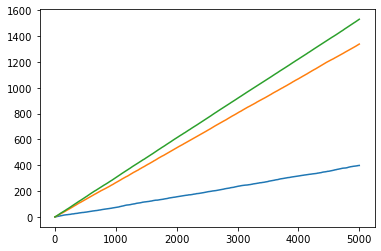

In [5]:
rnd = random(data)
stcb = staticBest(data)
optm = optimal(data)

In [6]:
def UCB(data):
    avg = [0]*10
    s = [1]*10
    
    score = [0]
    
    for i in range(10):
        avg[i] = data.iloc[i, i+5]
        score.append(data.iloc[i, i+5] + score[i])
        
    for i in range(10,data.shape[0]):
        arg = np.argmax(avg + 2*np.log(i+1)/s)
        avg[arg] = (avg[arg]*s[arg] + data.iloc[i, arg+5])/(s[arg]+1)
        score.append(data.iloc[i, arg+5] + score[i])
        s[arg]+=1
        
    return score

ucbs = UCB(data)
    

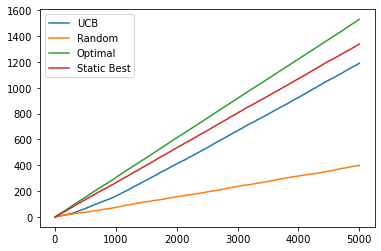

In [7]:
plt.plot(ucbs)
plt.plot(rnd)
plt.plot(optm)
plt.plot(stcb)
plt.legend(['UCB', 'Random', 'Optimal', 'Static Best'])
plt.show()

In [8]:
def linUCB(data,d=5, alpha=1.5):
    A = [np.identity(d)] * 10
    B = [np.zeros([d,1])] * 10
    score = [0]
    
    
    for t in range(data.shape[0]):
        #observe features of arm a
        theta = []
        p = []
        for i in range(10):
            #D = data.iloc[0,:5].values.reshape(5,-1)
            a_inv = np.linalg.inv(A[i])
            x = data.iloc[t,:5].values.reshape([-1,1])
            
            theta.append(a_inv@B[i])
            pt = (theta[i].T@x + alpha*np.sqrt((x.T@a_inv@x)[0][0]))[0][0]
            p.append(pt)
            
        
        #chosen arm
        arm = np.argmax(p)
        A[arm] = A[arm] + (x@x.T).astype(np.float)
        B[arm] = B[arm] + (data.iloc[t, arm+d]*x).astype(np.float)
        
        
        score.append(score[t] + data.iloc[t, arm+d])
        
    return score
            
lin_ucb = linUCB(data)   
            
    
    

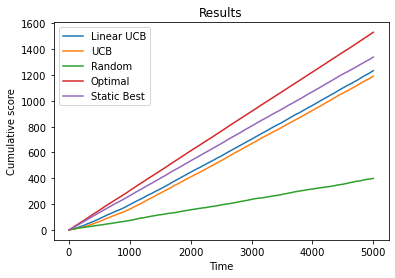

In [11]:
plt.plot(lin_ucb)
plt.plot(ucbs)
plt.plot(rnd)
plt.plot(optm)
plt.plot(stcb)
plt.title("Results")
plt.xlabel("Time")
plt.ylabel("Cumulative score")
plt.legend(['Linear UCB', 'UCB', 'Random', 'Optimal', 'Static Best'])
plt.show()